In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

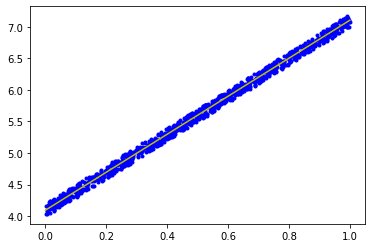

In [21]:
#y=4+3x
x=np.random.rand(1000,1)
y=4+3*x+.2*np.random.rand(1000,1)
one=np.ones((x.shape[0],1))
xbar=np.concatenate((one, x), axis=1)
plt.plot(x, y, 'b.')
def cost(w):
    N=xbar.shape[0]
    return .5/N*np.linalg.norm(y-xbar.dot(w))**2
def grad(w):
    N=xbar.shape[0]
    return 1./N*xbar.T.dot(xbar.dot(w)-y)
def has_converged(theta_new, grad):
    return np.linalg.norm(grad(theta_new))/len(theta_new) < 1e-3
# theta=theta+gamma*v_old+eta*grad(theta-gamma*v_ole)
theta_init=5*np.ones((2,1))
gamma=.9
eta=.1
def NAG(theta_init, grad, eta, gamma):
    theta=[theta_init]
    v_old=np.zeros_like(theta_init)
    for it in range(1000):
        v_new=gamma*v_old+grad(theta[-1]-gamma*v_old)
        theta.append(theta[-1]-v_new)
        if has_converged(theta[-1], grad):
            break
        v_old=v_new
    return theta[-1]
w=NAG(theta_init, grad, eta, gamma)
x0=np.linspace(0,1, 2)
y0=w[1][0]*x0+ w[0][0]
plt.plot(x0,y0,"y")

plt.show()